
# Welcome
> This project about the first project in the ADAND 

In [1]:
# Importing the main packages
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset_dir = r'D:\Google Drive\FWD Advanced Data Analysis Course\Projects\Project 1 - Investigate Data\Datasets'
df = pd.read_csv(rf'{dataset_dir}\tmdb-movies.csv', encoding="utf-8")
df ['profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


> **Columns:** cast, genres, production_companie include multiple values for the same row. 

In [3]:
## show the columns with NAs data
df.isna().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profit                     0
dtype: int64

In [4]:
# data with non-english characters
df[df.original_title.str.contains(r'[^\x00-\x7F]+', regex=True)]['original_title']

424              Belli di papÃ 
471              è§£æ•‘å´å…ˆç”Ÿ
702                   AutÃ³mata
758            Suite FranÃ§aise
848      Sheâ€™s Funny That Way
                  ...          
10497           Â¡Three Amigos!
10518                 DÃ¨moni 2
10575               MacskafogÃ³
10634    VÃ©ritÃ©s et Mensonges
10751             DoppelgÃ¤nger
Name: original_title, Length: 207, dtype: object

## Data Wrangling

### Changing the datatypes

In [5]:
# Transforming the release_date column to date object
df['release_date'] = pd.to_datetime(df['release_date'])


# handle the dates from teh 20th century.
df.loc[df['release_date'].dt.year>2018, 'release_date']  -= pd.DateOffset(years=100) 

# Make sure all the relaste date are properly converted
(df['release_date'].dt.year == df['release_year']).all()

# Get all the columns that have non-ascii characters, that may affect the analysis
non_ascii_columns = []

for col in df.select_dtypes(object):
    if df[col].str.contains(r'[^\x00-\x7F]+', regex=True).any(axis=0):
        non_ascii_columns.append(col)
non_ascii_columns        
# check for non-ascii characters

# print(df[df['original_title'].str.contains(r'[^\x00-\x7F]+', regex=True)])

# df.dropna(axis=0, inplace=True , subset=['cast'])

# df[df['cast'].str.contains(r'[^\x00-\x7F]+', regex=True)] ['cast'].str.split('/').head(50)

['original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'production_companies']

### Denormalizing the data, and breaking the composite columns

In [6]:
## this function to break the row that contains composite column into multiple rows 
def denormalize_data (df, col, sep=r'\|' ):
    if df[col].str.contains(sep).any():
        df['temp'] = df[col].str.split(sep)
        denormalized_df =  df.explode('temp', ignore_index=True)
        df.drop(columns='temp', inplace = True)
        denormalized_df[col] = denormalized_df['temp'] 
        denormalized_df.drop(columns='temp', inplace = True)
        return denormalized_df
        

In [7]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [8]:
# Denormalize & split the multivalue columns
## split_columns = ['cast', 'genres', 'production_companies']


genre_df= denormalize_data( df,'genres')

director_df = denormalize_data(genre_df, 'director')


In [29]:
director_df[director_df['director'].notna()]['director'].nunique()

5362

In [27]:
director_df[director_df['director'].notna()].groupby('director').size()

director
 FrÃ©dÃ©ric Jardin    4
A. Todd Smith         3
A.R. Murugadoss       5
Aaron Aites           1
Aaron Blaise          4
                     ..
Ã‡aÄŸan Irmak         2
Ã‰mile Gaudreault     2
Ã‰ric Besnard         1
Ã‰tienne Chatiliez    3
Ã€lex Pastor          5
Length: 5362, dtype: int64

In [22]:
# director_df['genres'] = director_df[(~director_df['director'].isna())&(~director_df['genres'].isna()) ].groupby('director')['genres'].apply(lambda x: x.fillna(x.mode()[0]))



# director_df['genres'] = 

# director_df[director_df['director'].notna()]['genres'] = 
temp =director_df[director_df['director'].notna()].groupby(by='director')['genres'].transform(lambda x: x.fillna(x.mode()[0] if x.mode().size>0 else x.mode()))
temp

# director_df[director_df['director'].notna()]['genres'].isna().sum()


0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
              ...       
29574            Mystery
29575             Comedy
29576             Action
29577             Comedy
29578             Horror
Name: genres, Length: 29486, dtype: object

In [10]:
genre_df['genres'].isna().sum()

23

> After replicating the movies based on the genres they have, there are 23 movies without a genre.

In [11]:
df.sort_values(by='popularity', ascending=False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,4.207106e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,5.557057e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,15412,tt0466460,0.001115,0,0,Khosla Ka Ghosla!,Anupam Kher|Boman Irani|Parvin Dabas|Tara Shar...,NaN,Dibakar Banerjee,A Delhi-based retired middle class man tries t...,...,135,Comedy,UTV Motion Pictures,2006-09-22,10,6.8,2006,0.000000e+00,0.000000e+00,0.000000e+00
6551,31329,tt0445570,0.000973,0,0,Mon petit doigt m'a dit...,Catherine Frot|AndrÃ© Dussollier|GeneviÃ¨ve Bu...,NaN,Pascal Thomas,NaN,...,105,Comedy|Mystery,RhÃ´ne-Alpes CinÃ©ma|France2 CinÃ©ma,2005-04-13,13,5.7,2005,0.000000e+00,0.000000e+00,0.000000e+00
6080,174323,tt2429074,0.000620,0,0,G.B.F.,Michael J. Willett|Paul Iacono|Sasha Pieterse|...,https://www.facebook.com/GBFmovie,Darren Stein,Being out has never been so in.,...,92,Comedy,School Pictures|Parting Shots Media|Logolite E...,2013-10-20,82,6.1,2013,0.000000e+00,0.000000e+00,0.000000e+00
9977,32082,tt0067217,0.000188,0,0,The Hospital,George C. Scott|Diana Rigg|Richard Dysart|Barn...,NaN,Arthur Hiller,"Madness, Murder and Malpractice.",...,103,Mystery|Comedy|Drama,Simcha Productions,1971-12-14,10,6.4,1971,0.000000e+00,0.000000e+00,0.000000e+00


# Questions
## Q1) What is the most movies genre people loved over the time?
### In term of number of the profit

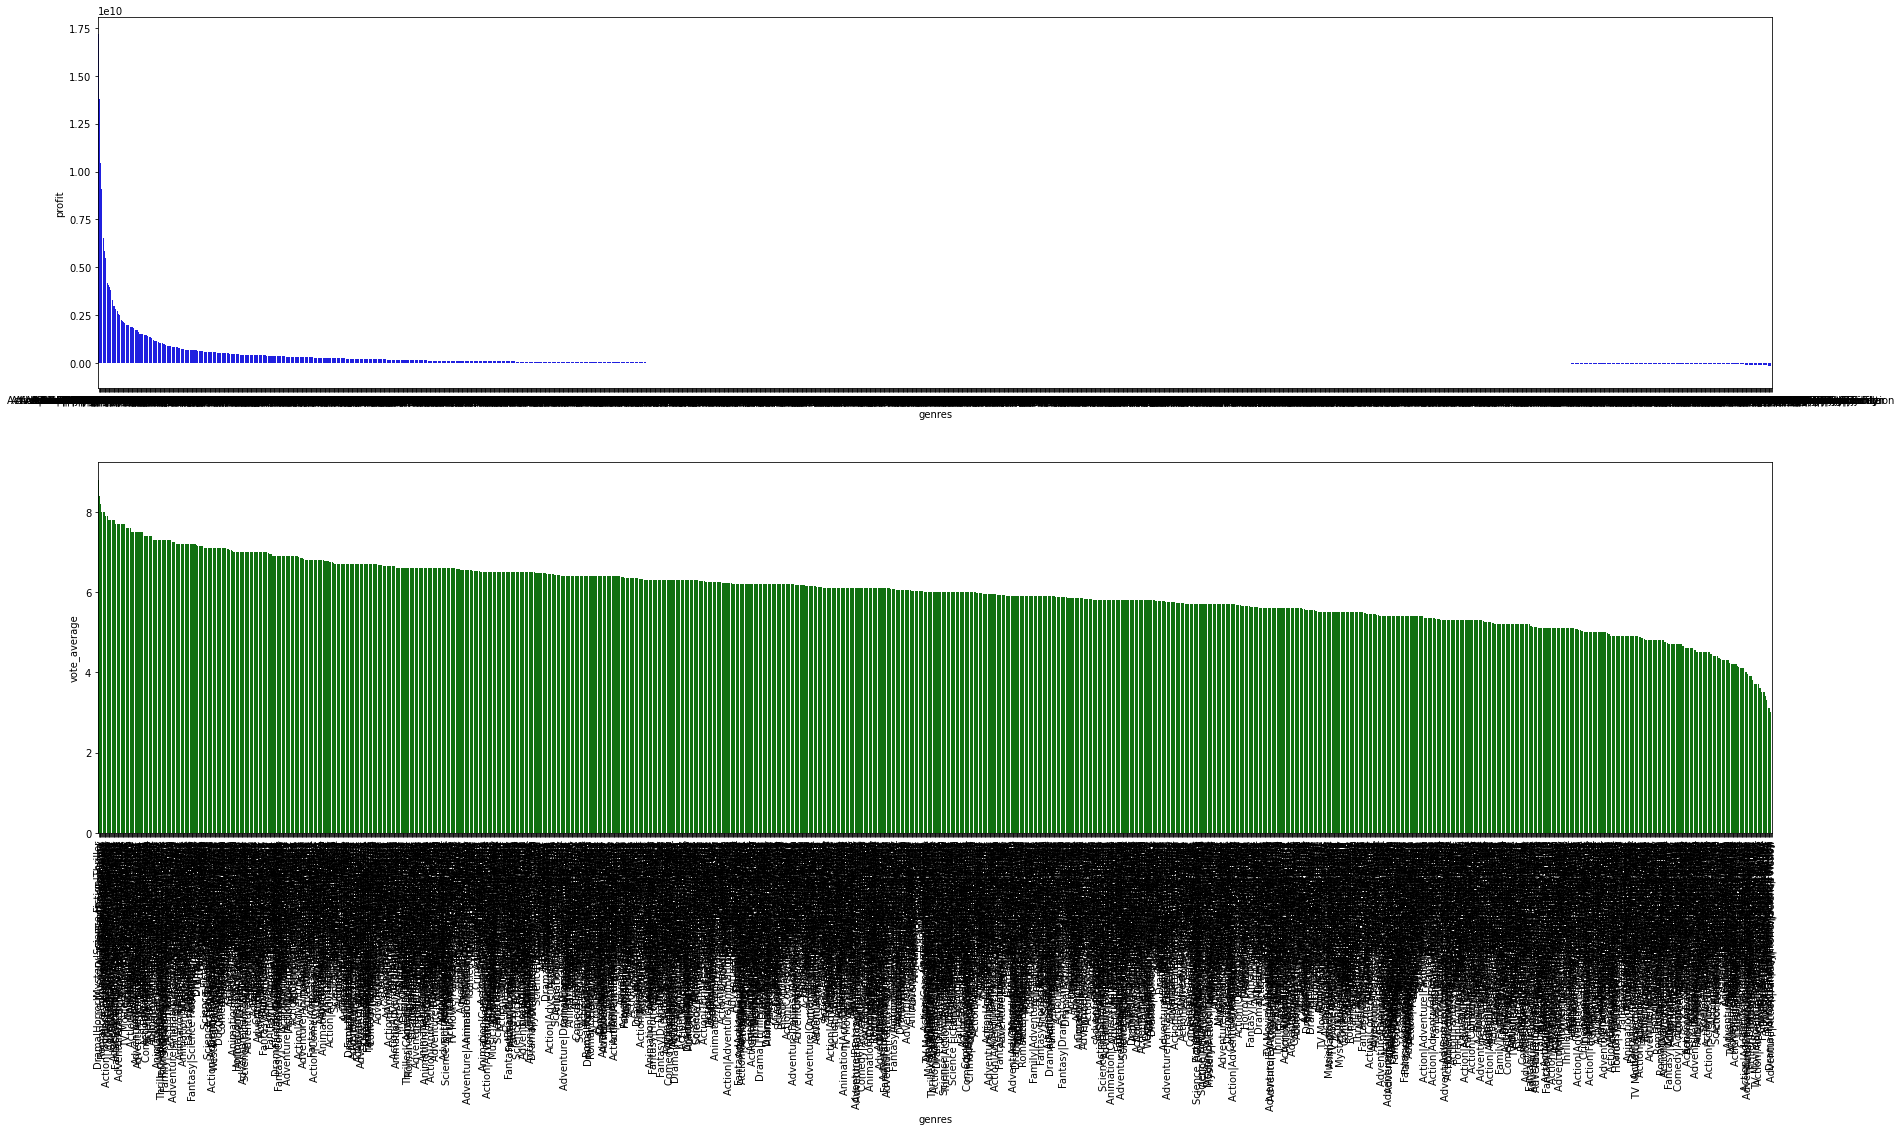

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(30, 15))

df_aggregated = df.loc[:  , ['release_year','genres','vote_count', 'vote_average', 'profit']].groupby(as_index= False, by=['release_year','genres']).agg({'vote_count': 'sum', 'vote_average': 'mean', 'profit': 'sum'}).sort_values(by=['release_year','profit'], ascending=[True, False], ignore_index=True)
sb.barplot(ax= axes[0], color='blue', x='genres', y='profit',data=df_aggregated.groupby(by=['genres'], as_index= False)['profit'].sum().sort_values(by='profit', ascending=False))
plt.xticks(rotation=90);

sb.barplot(ax= axes[1], color='green', x='genres', y='vote_average',data=df_aggregated.groupby(by=['genres'], as_index= False)['vote_average'].mean().sort_values(by='vote_average', ascending=False))
plt.xticks(rotation=90);





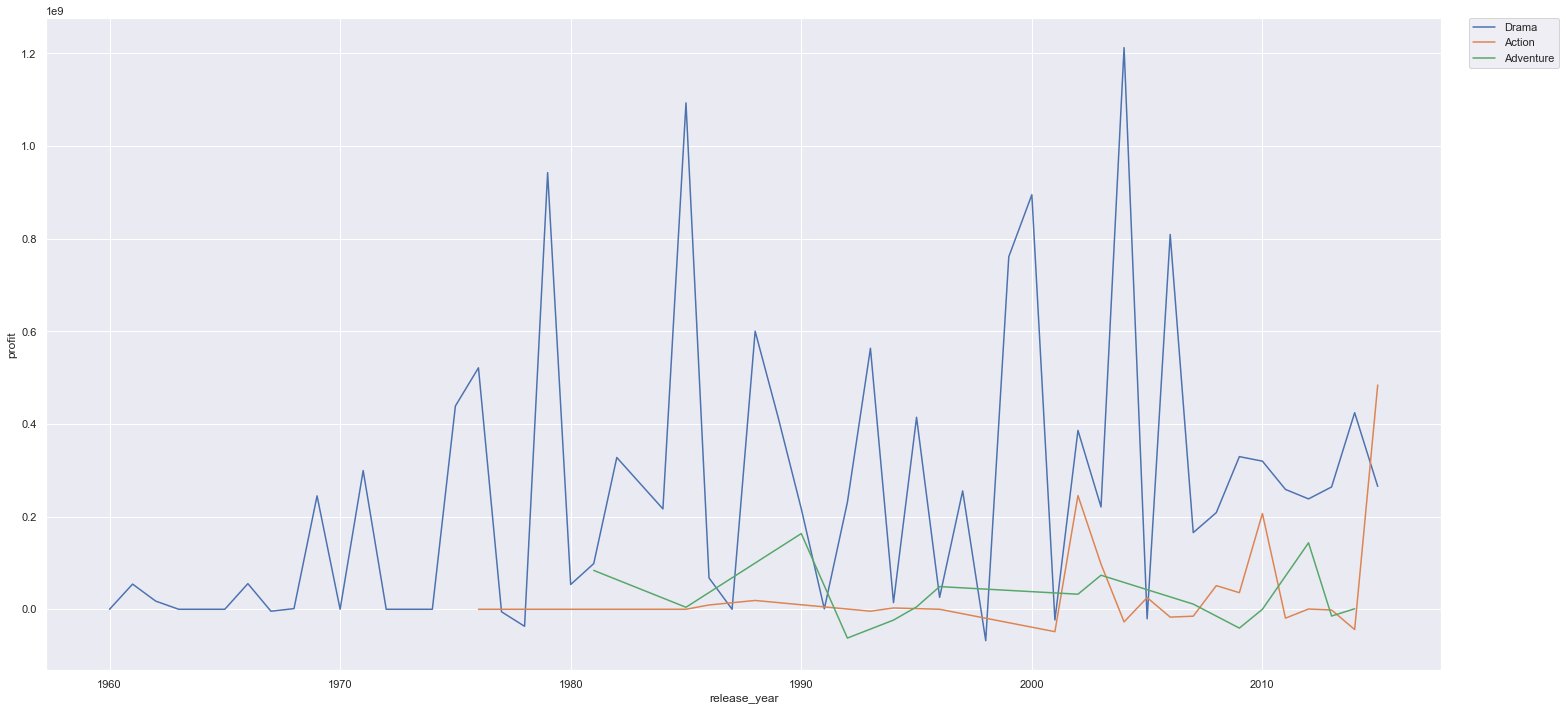

In [13]:
sb.set(rc={'figure.figsize':(25,12)})
sb.lineplot(x='release_year', y='profit', data= df_aggregated.loc[df_aggregated['genres'].isin( ['Drama', 'Action',  'Adventure']) ,:], hue= 'genres')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.xticks(rotation=0);



<AxesSubplot:xlabel='vote_count', ylabel='profit'>

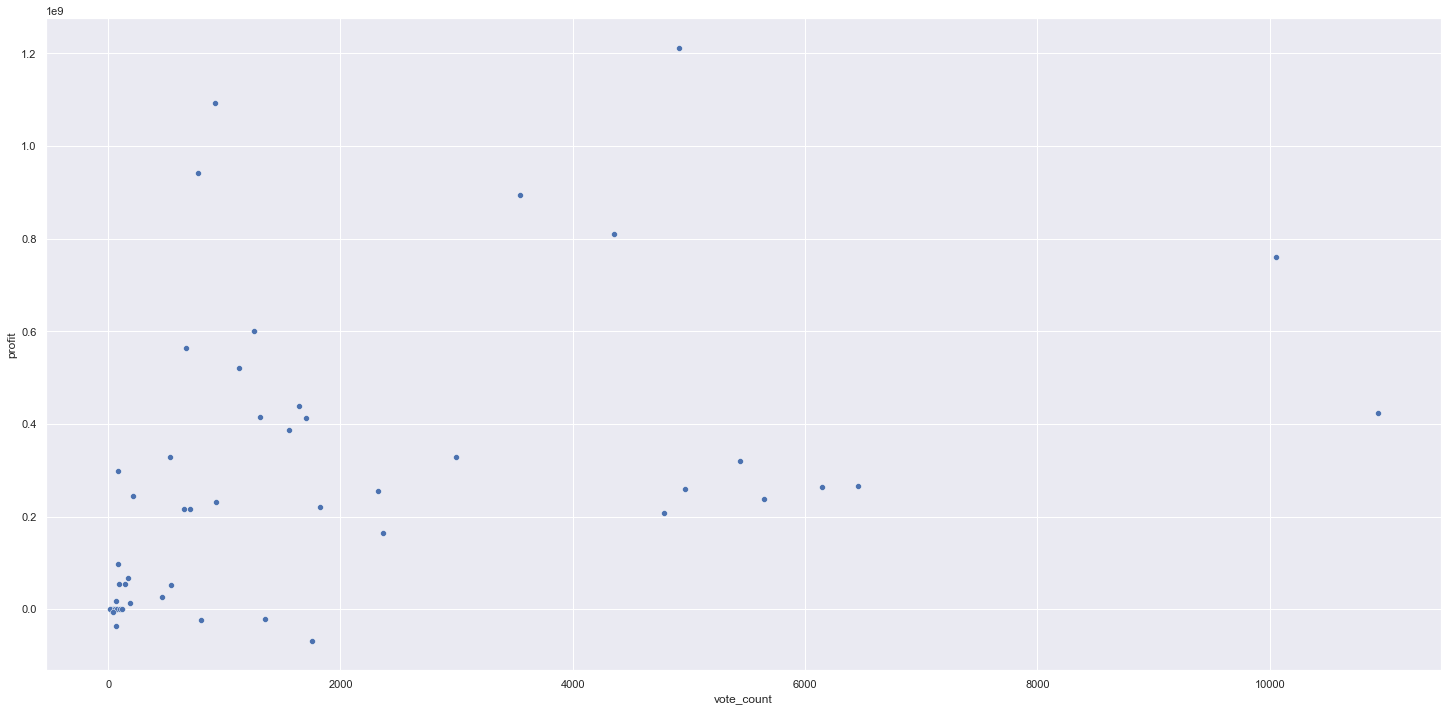

In [14]:
sb.scatterplot(data=df_aggregated[df_aggregated['genres'] == 'Drama'], x='vote_count', y='profit')

In [15]:
df[ (df['genres'] == 'Drama') & (df['release_year'] > 1970) & (df['release_year'] < 1980) ].sort_values(by='profit', ascending= False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
7833,1367,tt0079817,1.049233,7000000,200182160,Rocky II,Sylvester Stallone|Talia Shire|Burt Young|Carl...,NaN,Sylvester Stallone,Once he fought for a dream. Now he's fighting ...,...,119,Drama,United Artists,1979-06-15,504,6.8,1979,2.103188e+07,6.014581e+08,5.804262e+08
10174,1366,tt0075148,2.389663,1100000,117235147,Rocky,Sylvester Stallone|Talia Shire|Burt Young|Carl...,NaN,John G. Avildsen,His whole life was a million-to-one shot.,...,119,Drama,United Artists,1976-11-21,963,7.2,1976,4.214868e+06,4.492097e+08,4.449948e+08
9805,510,tt0073486,3.258151,3000000,108981275,One Flew Over the Cuckoo's Nest,Jack Nicholson|Louise Fletcher|Danny DeVito|Wi...,NaN,MiloÅ¡ Forman,"If he's crazy, what does that make you?",...,133,Drama,Fantasy Films|Warner Bros.,1975-11-18,1612,8.0,1975,1.215546e+07,4.415726e+08,4.294172e+08
7848,12102,tt0079417,0.416453,8000000,106260000,Kramer vs. Kramer,Dustin Hoffman|Meryl Streep|Jane Alexander|Jus...,NaN,Robert Benton,There are three sides to this love story,...,105,Drama,Columbia Pictures,1979-12-19,240,7.3,1979,2.403643e+07,3.192639e+08,2.952275e+08
9968,36492,tt0066892,0.116440,0,28623900,Carnal Knowledge,Jack Nicholson|Candice Bergen|Art Garfunkel|An...,NaN,Mike Nichols,Everyone needs to be loved - sometime or another.,...,98,Drama,AVCO Embassy Pictures,1971-10-21,11,6.1,1971,0.000000e+00,1.541453e+08,1.541453e+08
9951,25188,tt0067328,0.369308,1300000,29133000,The Last Picture Show,Timothy Bottoms|Jeff Bridges|Cybill Shepherd|B...,http://www.filmsite.org/lastp.html,Peter Bogdanovich,"Anarene, Texas, 1951. Nothing much has changed...",...,118,Drama,Columbia Pictures Corporation|BBS Productions,1971-10-03,42,7.0,1971,7.000753e+06,1.568869e+08,1.498861e+08
10185,10774,tt0074958,0.476406,3800000,23689877,Network,Faye Dunaway|William Holden|Peter Finch|Robert...,NaN,Sidney Lumet,Not since the dawn of time has America experie...,...,121,Drama,United Artists|Metro-Goldwyn-Mayer (MGM),1976-11-01,161,7.4,1976,1.456045e+07,9.077245e+07,7.621200e+07
7879,40842,tt0079638,0.058087,0,22228000,Norma Rae,Sally Field|Beau Bridges|Ron Leibman|Pat Hingl...,NaN,Martin Ritt,The story of a woman with the courage to risk ...,...,110,Drama,Twentieth Century Fox Film Corporation,1979-03-02,13,5.8,1979,0.000000e+00,6.678523e+07,6.678523e+07
9822,22094,tt0073092,0.423755,2700000,5000000,Hard Times,Charles Bronson|James Coburn|Jill Ireland|Stro...,NaN,Walter Hill,"New Orleans, 1933. In those days words didn't ...",...,93,Drama,Columbia Pictures Corporation,1975-09-04,14,5.9,1975,1.093992e+07,2.025911e+07,9.319189e+06
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,117,Drama,Twentieth Century Fox Film Corporation,1977-10-02,10,5.0,1977,0.000000e+00,0.000000e+00,0.000000e+00


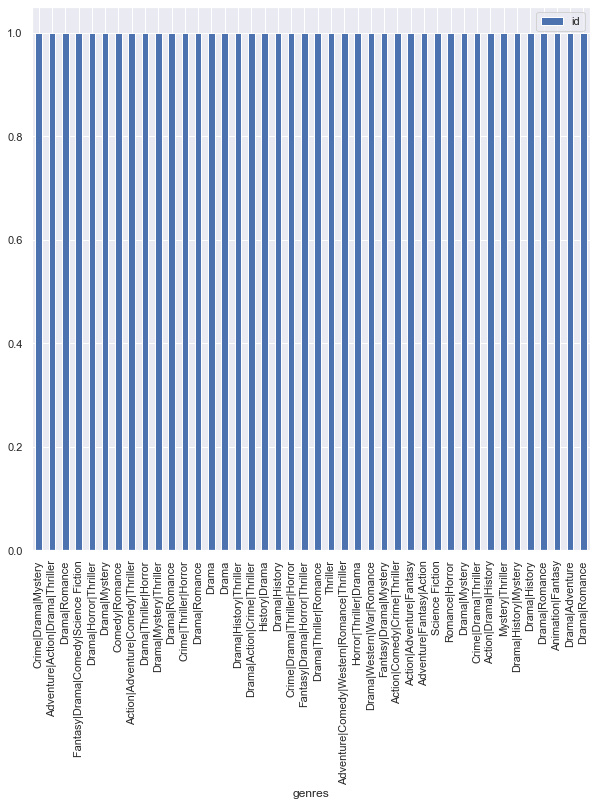

In [16]:
top_genres= df.groupby(['cast', 'genres'])[['id']].nunique().sort_values(['id', 'cast'] , ascending=[False, True])

top_genres.reset_index(inplace= True)

top_genres[top_genres['cast'].str.contains('Anthony Hopkins')].plot.bar(x='genres', figsize=(10,10));

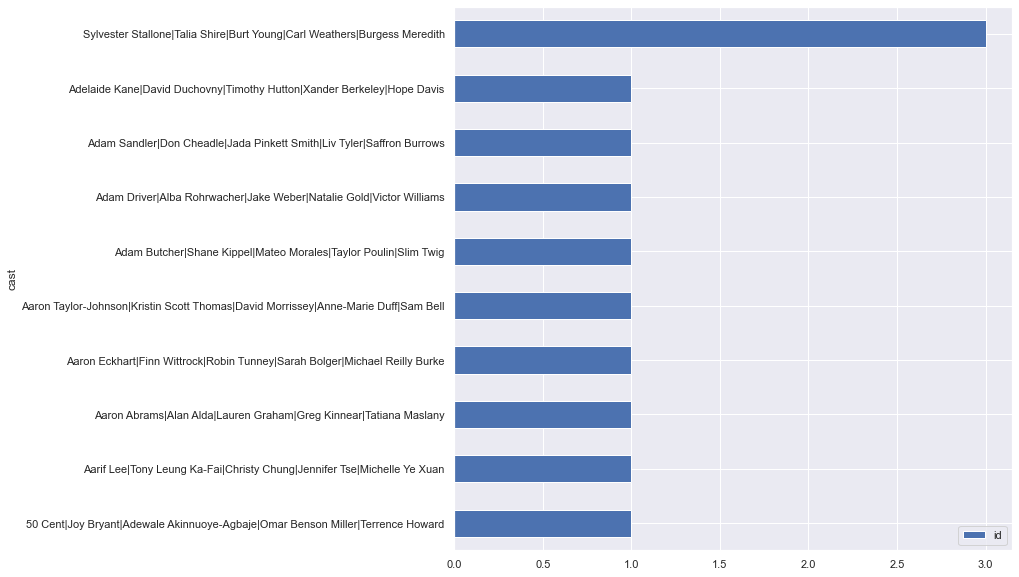

In [17]:
top_genres[top_genres['genres']== 'Drama'].iloc[0:10,:].sort_values('id', ascending=True).plot.barh(x='cast', figsize=(10,10));

In [18]:
d = df.groupby(['release_year', 'cast'])[['id']].count().rename(columns={'id': 'count'})
d
#d.sort_values(by=['release_year', 'cast'], ascending=True).plot.line()

count
release_year cast                                                     
1960         Albert Finney|Shirley Anne Field|Rachel Roberts...      1
             Anthony Perkins|Vera Miles|John Gavin|Janet Lei...      1
             Burt Lancaster|Audrey Hepburn|Audie Murphy|John...      1
             Burt Lancaster|Jean Simmons|Arthur Kennedy|Dean...      1
             Cary Grant|Deborah Kerr|Robert Mitchum|Jean Sim...      1
...                                                                ...
2015         William Shatner|George Buza|Rob Archer|ZoÃ© De ...      1
             Yaya DaCosta|Arlen Escarpeta|Yolanda Ross|Mark ...      1
             Zac Efron|Emily Ratajkowski|Wes Bentley|Nick Ro...      1
             Zooey Deschanel|Aubrey Plaza|Anton Yelchin|Alia...      1
             Zosia Mamet|Jessica Biel|Joe Anderson|Edi Gathe...      1

[10785 rows x 1 columns]